<a href="https://colab.research.google.com/github/patosorio/spotify_50_tracks_analysis/blob/master/spotify_top_50_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis top 50 Tracks list in Spotify 2020

In [2]:
# Importing libraries and loading data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit

df = pd.read_csv('spotifytoptracks.csv', index_col=0)
df

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
0,The Weeknd,After Hours,Blinding Lights,0VjIjW4GlUZAMYd2vXMi3b,0.730,0.514,1,-5.934,0.00146,0.0598,0.000095,0.0897,0.3340,171.005,200040,R&B/Soul
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.68800,0.0988,0.000161,0.1700,0.5400,98.078,209755,Alternative/Indie
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.10400,0.0559,0.000000,0.7900,0.6420,116.971,196653,Hip-Hop/Rap
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.01490,0.0506,0.004320,0.2850,0.8940,121.962,176219,Dance/Electronic
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.01230,0.0830,0.000000,0.0951,0.6790,123.950,183290,Nu-disco
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.24700,0.1640,0.000000,0.1010,0.4970,89.977,181733,Hip-Hop/Rap
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.12200,0.0465,0.000000,0.3350,0.5570,95.390,174000,Pop
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.73100,0.1350,0.000000,0.6960,0.3480,144.026,173333,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.12300,0.0364,0.000000,0.0887,0.2360,127.087,159382,R&B/Hip-Hop alternative
9,Lewis Capaldi,Divinely Uninspired To A Hellish Extent,Someone You Loved,7qEHsqek33rTcFNT9PFqLf,0.405,0.501,1,-5.679,0.75100,0.0319,0.000000,0.1050,0.4460,109.891,182161,Alternative/Indie


In [3]:
# Removing whitespaces at the beginning of the string and replacing whitespace between composed genres with '-' 
# using regex

df['genre'] = df['genre'].replace(r'^\s+', '')
df['genre'] = df['genre'].replace(r'\s+', '-')

#### How many observations are there in this dataset and how many features this dataset has?

In [ ]:
print(f'This dataset has {df.shape[0]} observations and {df.shape[1]} features.')

This dataset has 50 observations and 16 features.


#### Which of the features are categorical and which are numerical?

* Categorical: Artist, Album, Track Name, Track ID, Key, Tempo, Genre.
* Numerical: Energy, Danceability, loudness, acousticness, speechiness, instrumentalness, liveness, valence, duration ms.

#### Handling missing values, checking duplicates and treating outliers

In [ ]:
# Checking if there is any null value in the dataset
df.isnull().any()

artist              False
album               False
track_name          False
track_id            False
energy              False
danceability        False
key                 False
loudness            False
acousticness        False
speechiness         False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
genre               False
dtype: bool

In [ ]:
# Checking if there is any duplicate in the dataset

df.duplicated().any()

False

To treat the outliers we are going to check the distribution of the data for the following features using a box plot from matplitlib.

* **Energy** - Measured from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
* **Danceability** - Measured from 0.0 to 1.0 represents how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity.
* **Loudness** - The overall loudness of a track in decibels. Values typically range between -60 and 0 db
* **Acousticness** - Measured from 0.0 to 1.0 Predicts whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
* **Speechiness** - Speechiness detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values below 0.33 most likely represent music and other non-speech-like tracks.
* **Instrumentalness** - Measured from 0.0 to 1.0. Predicts whether a track contains no vocals. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content.
* **Liveness** - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. > 0.8 High probability that the track is recorded live.
* **Valence** - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. High Valence - high positivity.

We will print the min and max value to identify easily the outlier. For the features that has a fixed measure we want to identify those that are out of range.

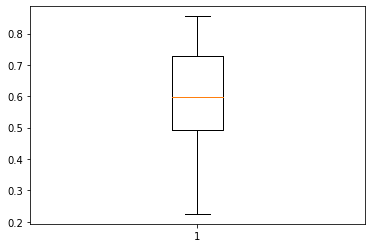

In [ ]:
# Printing out a boxplot to check outliers in the energy column.
%matplotlib inline

plt.boxplot(df['energy'])
plt.show()

No outliers detected for the energy points. 

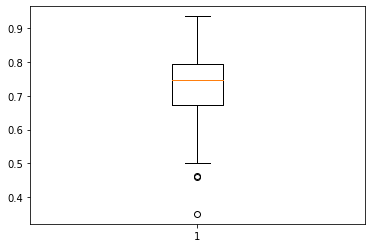

In [ ]:
# Printing out a boxplot to check outliers for the danceability column.
plt.boxplot(df['danceability'])
plt.show()

In [ ]:
# Showing the tracks below 0.5 points in danceability. 
df[df.danceability < 0.5].sort_values(by="danceability", ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
47,JP Saxe,If the World Was Ending (feat. Julia Michaels),If the World Was Ending - feat. Julia Michaels,2kJwzbxV2ppxnQoYw4GLBZ,0.473,0.464,1,-10.086,0.866,0.1290,0.0,0.1090,0.604,75.801,208687,Pop
16,Lewis Capaldi,Divinely Uninspired To A Hellish Extent (Exten...,Before You Go,2gMXnyrvIjhVBUZwvLZDMP,0.575,0.459,3,-4.858,0.604,0.0573,0.0,0.0885,0.183,111.881,215107,Alternative/Indie
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.0950,0.120,115.284,200186,Chamber pop


The higher the acoustic the tracks are the less danceable are. 

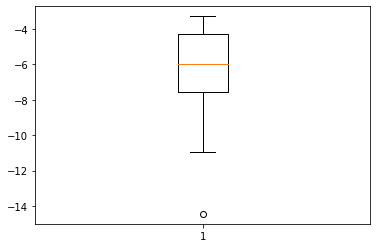

In [ ]:
# Printing loudness column boxplot below
plt.boxplot(df['loudness'])
plt.show()

In [ ]:
# Printing out the tracks below -11 in loudness.
df[df.loudness < -11]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.902,0.0994,0.657,0.106,0.243,120.006,245426,Pop


The high points in the acousticness seems to be the reason why loudness is such low in compare with other tracks. 

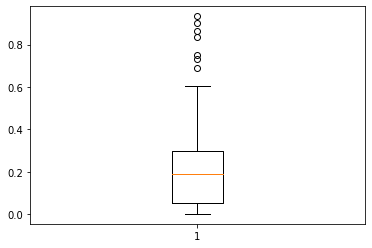

In [ ]:
# Printing acousticness column boxplot below
plt.boxplot(df['acousticness'])
plt.show()

In [ ]:
# Printing out outliers
most_acoustic_tracks = df[df.acousticness > 0.6].sort_values(by="acousticness", ascending=False)

In [ ]:
print(f'{(len(most_acoustic_tracks) / len(df)) * 100} % of the tracks are highly more acoustic than the others. It\'s points are above 0.6')

16.0 % of the tracks are highly more acoustic than the others. It's points are above 0.6


I won't treat them as outliers.

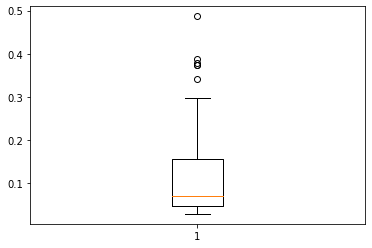

In [ ]:
# Print out speechiness boxplot 
plt.boxplot(df['speechiness'])
plt.show()

In [ ]:
speech_like_tracks = df[df.speechiness > 0.66].sort_values(by="speechiness", ascending=False)
speech_music_tracks = df[(df.speechiness > 0.33)].sort_values(by="speechiness", ascending=False)
non_speech_tracks = df[df.speechiness < 0.33].sort_values(by="speechiness", ascending=False)

Tracks with speechness values over 0.66 describe tracks that are probably made entirely of spoken words. 
There are 0 tracks in our dataset that are made entirely of spoken words. 
6 tracks are under 0.6 and above 0.33 describe tracks that may contain both music and speech, 
either in sections or layered, including such cases as rap music.
The rest of the 44 tracks are music and non-speech tracks.

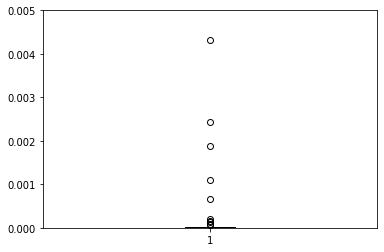

In [ ]:
# Printing out instrumentalness boxplot
plt.boxplot(df['instrumentalness'])
plt.ylim(0, 0.005)
plt.show()

In [ ]:
# Printing out outliers
df[df.instrumentalness > 0.5]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.902,0.0994,0.657,0.106,0.243,120.006,245426,Pop


Mostly all of the instrumentalness values are below 0.5, meaning that are no instrumental tracks in this dataset, since values above 0.5 are intended to represent instrumental tracks.
The only track found to have an instrumental value above 0.5 is "everything i wanted" from Billie Eilish with a 0.657 score recorded. 

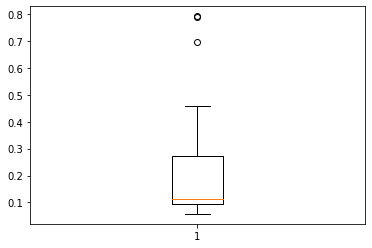

In [ ]:
# Printing out liveness value boxplot
plt.boxplot(df['liveness'])
plt.show()

In [ ]:
# Printing out the outliers
df[df.liveness > 0.5]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.1040,0.0559,0.00000,0.790,0.642,116.971,196653,Hip-Hop/Rap
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.7310,0.1350,0.00000,0.696,0.348,144.026,173333,Hip-Hop/Rap
41,Black Eyed Peas,Translation,RITMO (Bad Boys For Life),4NCsrTzgVfsDo8nWyP8PPc,0.704,0.723,10,-7.088,0.0259,0.0571,0.00109,0.792,0.684,105.095,214935,Pop


A value above 0.8 provides strong likelihood that the track is live. There's no tracks with a liveness above 0.8.

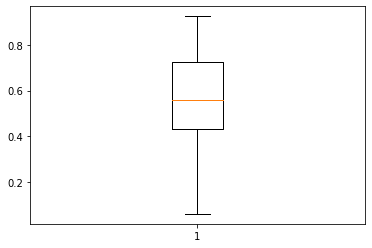

In [ ]:
# Printing out valence values boxplot
plt.boxplot(df['valence'])
plt.show()

There are no outliers in this column.

#### Are there any artists that have more than 1 popular track? If yes, which and how many?

In [ ]:
# Track count by artist and sorting out those with more than 1 track
track_count = df.groupby(['artist'])['artist'].count().sort_values(ascending=False)
track_count.where(track_count  > 1).dropna()

artist
Travis Scott     3.0
Billie Eilish    3.0
Dua Lipa         3.0
Justin Bieber    2.0
Post Malone      2.0
Harry Styles     2.0
Lewis Capaldi    2.0
Name: artist, dtype: float64

#### Who was the most popular artist?

Considering most popular those artists that have more albums in the list and the most popular will be the artist that its position is lower in the tracks list. 

In [ ]:
# Finding how many albums does an artist have in the top 50 tracks and which artist have more than 
# 1 album in the top 50 tracks.

artist_album_count = df.groupby('artist')['album'].nunique().sort_values(ascending=False)
artist_album_count.where(artist_album_count > 1).dropna()

artist
Travis Scott     3.0
Billie Eilish    3.0
Lewis Capaldi    2.0
Name: album, dtype: float64

In [ ]:
# From the popular artist we get the artist that it's position is lower in the 50 Top tracks list
popular_artist = artist_album_count.where(artist_album_count == artist_album_count.max()).dropna()
popular_artist
#most_popular_artist = df[df["artist"].isin(popular_artist_album.index.tolist())]
#print(f'The most popular artist is {most_popular_artist.artist} with {popular_artist_album[most_popular_artist.artist]} albums and lower position in the track list.')

artist
Travis Scott     3.0
Billie Eilish    3.0
Name: album, dtype: float64

In [ ]:
most_popular_artist = df[df["artist"].isin(popular_artist.index.tolist())].iloc[0]
most_popular_artist
print(f'The most popular artist is {most_popular_artist.artist} with {popular_artist[most_popular_artist.artist]} albums and lower position in the track list.')

The most popular artist is Billie Eilish with 3.0 albums and lower position in the track list.


#### How many artists in total have their songs in the top 50?

In [ ]:
print(f'{len(df.artist.unique())} artist in total have their song in the top 50 Spotify tracks.')

40 artist in total have their song in the top 50 Spotify tracks.


#### Are there any albums that have more than 1 popular track? If yes, which and how many?

In [ ]:
# Following the same methos as tracks per artist we will count how many albums
# have more than a popular track in the top 50 tracks list

track_count = df.groupby(['album'])['album'].count().sort_values(ascending=False)
track_count.where(track_count  > 1).dropna()

album
Future Nostalgia        3.0
Fine Line               2.0
Hollywood's Bleeding    2.0
Changes                 2.0
Name: album, dtype: float64

In [ ]:
print(f'{len(df.album.unique())} albums in total have their songs in the top 50 Spotify tracks.')

45 albums in total have their songs in the top 50 Spotify tracks.


#### Which tracks have a danceability score above 0.7?


In [ ]:
df[df['danceability'] > 0.7].head().sort_values(by='danceability', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
2,Roddy Ricch,Please Excuse Me For Being Antisocial,The Box,0nbXyq5TXYPCO7pr3N8S4I,0.586,0.896,10,-6.687,0.1040,0.0559,0.000000,0.7900,0.642,116.971,196653,Hip-Hop/Rap
1,Tones And I,Dance Monkey,Dance Monkey,1rgnBhdG2JDFTbYkYRZAku,0.593,0.825,6,-6.401,0.6880,0.0988,0.000161,0.1700,0.540,98.078,209755,Alternative/Indie
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.0123,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
3,SAINt JHN,Roses (Imanbek Remix),Roses - Imanbek Remix,2Wo6QQD1KMDWeFkkjLqwx5,0.721,0.785,8,-5.457,0.0149,0.0506,0.004320,0.2850,0.894,121.962,176219,Dance/Electronic
5,DaBaby,BLAME IT ON BABY,ROCKSTAR (feat. Roddy Ricch),7ytR5pFWmSjzHJIeQkgog4,0.690,0.746,11,-7.956,0.2470,0.1640,0.000000,0.1010,0.497,89.977,181733,Hip-Hop/Rap


#### Which tracks have a danceability score below 0.4?

In [ ]:
df[df['danceability'] < 0.4].head().sort_values(by='danceability', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.934,0.0333,0.0,0.095,0.12,115.284,200186,Chamber pop


#### Which tracks have their loudness above -5?

In [ ]:
df[df['loudness'] > -5].head().sort_values(by='loudness', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
10,KAROL G,Tusa,Tusa,7k4t7uLgtOxPwTpFmtJNTY,0.715,0.803,2,-3.280,0.2950,0.2980,0.000134,0.0574,0.574,101.085,200960,Pop
12,Post Malone,Hollywood's Bleeding,Circles,21jGcNKet2qwijlDFuPiPb,0.762,0.695,0,-3.497,0.1920,0.0395,0.002440,0.0863,0.553,120.042,215280,Pop/Soft Rock
6,Harry Styles,Fine Line,Watermelon Sugar,6UelLqGlWMcVH1E5c4H7lY,0.816,0.548,0,-4.209,0.1220,0.0465,0.000000,0.3350,0.557,95.390,174000,Pop
4,Dua Lipa,Future Nostalgia,Don't Start Now,3PfIrDoz19wz7qK7tYeu62,0.793,0.793,11,-4.521,0.0123,0.0830,0.000000,0.0951,0.679,123.950,183290,Nu-disco
16,Lewis Capaldi,Divinely Uninspired To A Hellish Extent (Exten...,Before You Go,2gMXnyrvIjhVBUZwvLZDMP,0.575,0.459,3,-4.858,0.6040,0.0573,0.000000,0.0885,0.183,111.881,215107,Alternative/Indie


#### Which tracks have their loudness below -8?

In [ ]:
df[df['loudness'] < -8].head().sort_values(by='loudness', ascending=False)

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
20,Jawsh 685,Savage Love (Laxed - Siren Beat),Savage Love (Laxed - Siren Beat),1xQ6trAsedVPCdbtDAmk0c,0.481,0.767,0,-8.520,0.234,0.0803,0.000000,0.2690,0.761,150.076,171375,Hip-Hop/Rap
8,Trevor Daniel,Nicotine,Falling,2rRJrJEo19S2J82BDsQ3F7,0.430,0.784,10,-8.756,0.123,0.0364,0.000000,0.0887,0.236,127.087,159382,R&B/Hip-Hop alternative
7,Powfu,death bed (coffee for your head),death bed (coffee for your head),7eJMfftS33KTjuF7lTsMCx,0.431,0.726,8,-8.765,0.731,0.1350,0.000000,0.6960,0.348,144.026,173333,Hip-Hop/Rap
15,Drake,Dark Lane Demo Tapes,Toosie Slide,466cKvZn1j45IpxDdYZqdA,0.490,0.830,1,-8.820,0.289,0.2090,0.000003,0.1130,0.845,81.604,247059,Hip-Hop/Rap
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.902,0.0994,0.657000,0.1060,0.243,120.006,245426,Pop


#### Which track is the longest?

In [ ]:
df.iloc[df['duration_ms'].idxmax()]

artist                        Travis Scott
album                           ASTROWORLD
track_name                      SICKO MODE
track_id            2xLMifQCjDGFmkHkpNLD9h
energy                                0.73
danceability                         0.834
key                                      8
loudness                            -3.714
acousticness                       0.00513
speechiness                          0.222
instrumentalness                       0.0
liveness                             0.124
valence                              0.446
tempo                              155.008
duration_ms                         312820
genre                          Hip-Hop/Rap
Name: 49, dtype: object

Which track is the shortest?

In [ ]:
df.iloc[df['duration_ms'].idxmin()]

artist                            24kGoldn
album               Mood (feat. iann dior)
track_name          Mood (feat. iann dior)
track_id            3tjFYV6RSFtuktYl3ZtYcq
energy                               0.722
danceability                           0.7
key                                      7
loudness                            -3.558
acousticness                         0.221
speechiness                         0.0369
instrumentalness                       0.0
liveness                             0.272
valence                              0.756
tempo                               90.989
duration_ms                         140526
genre                              Pop rap
Name: 23, dtype: object

#### Which genre is the most popular?

In [ ]:
popular_genre = df.groupby(['genre'])['genre'].count().sort_values(ascending=False)
popular_genre

genre
Pop                                   14
Hip-Hop/Rap                           13
Dance/Electronic                       5
Alternative/Indie                      4
 Electro-pop                           2
R&B/Soul                               2
Alternative/reggaeton/experimental     1
Chamber pop                            1
Dance-pop/Disco                        1
Disco-pop                              1
Dreampop/Hip-Hop/R&B                   1
Hip-Hop/Trap                           1
Nu-disco                               1
Pop rap                                1
Pop/Soft Rock                          1
R&B/Hip-Hop alternative                1
Name: genre, dtype: int64

Pop & Hip-Hop/Rap genres are the most popular in the top 50 tracks list. 

#### Which genres have just one song on the top 50?

In [ ]:
popular_genre[popular_genre == 1]

genre
Alternative/reggaeton/experimental    1
Chamber pop                           1
Dance-pop/Disco                       1
Disco-pop                             1
Dreampop/Hip-Hop/R&B                  1
Hip-Hop/Trap                          1
Nu-disco                              1
Pop rap                               1
Pop/Soft Rock                         1
R&B/Hip-Hop alternative               1
Name: genre, dtype: int64

#### Which features are strongly positively correlated? Which features are strongly negatively correlated? Which features are not correlated?



Text(0.5, 1.0, 'Features correlation')

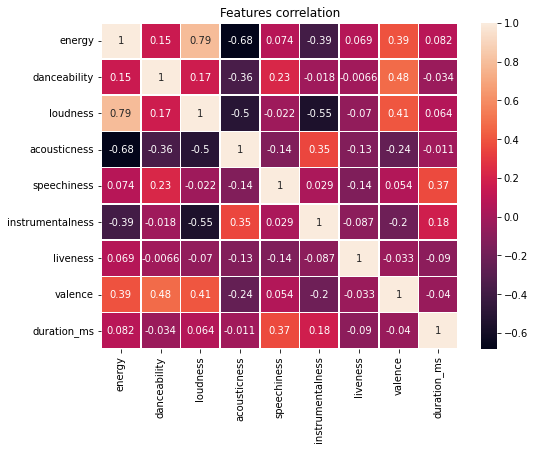

In [ ]:
# Generate a heat map to visualize correlation between features using seaborn library imported below

import seaborn as sns

numerical_features = list(['energy', 'danceability', 'loudness', 'acousticness', 'speechiness', 'instrumentalness', 'liveness', 'valence', 'duration_ms'])
correlation = df[numerical_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, linewidths=.5).set_title('Features correlation')

Energy and loudness are strongly positive correlated. 

Valence is positively correlated with energy, danceability and loudness. 

Acousticness is negatively correlated with loudness and energy, and positively correlated with instrumentalness.

Instrumentalness is negatively correlated with energy and loudness. 

There's a positive correlation between duration and speechiness, the more its duration the higher the speechiness. There's correlation between duration and other features.


#### How does the danceability, loudness and acousticness scores compare between Pop, Hip-Hop/Rap, Dance/Electronic, and Alternative/Indie genres?

In [ ]:
# Define selected most popular genres and features for our analysis and describe the mean, max and min values. 

selected_features = ['danceability', 'loudness', 'acousticness']
selected_genres = ['Pop', 'Hip-Hop/Rap', 'Dance/Electronic', 'Alternative/Indie']

In [ ]:
df.groupby(['genre'])[selected_features].aggregate([np.mean, np.max, np.min]).loc[selected_genres]

danceability                loudness                 \
                          mean   amax   amin      mean   amax    amin   
genre                                                                   
Pop                   0.677571  0.806  0.464 -6.460357 -3.280 -14.454   
Hip-Hop/Rap           0.765538  0.896  0.598 -6.917846 -3.370  -8.820   
Dance/Electronic      0.755000  0.880  0.647 -5.338000 -3.756  -7.567   
Alternative/Indie     0.661750  0.862  0.459 -5.421000 -4.746  -6.401   

                  acousticness                  
                          mean   amax     amin  
genre                                           
Pop                   0.323843  0.902  0.02100  
Hip-Hop/Rap           0.188741  0.731  0.00513  
Dance/Electronic      0.099440  0.223  0.01370  
Alternative/Indie     0.583500  0.751  0.29100

Hip-Hop / Rap and Dance / Electronic genres have a high danceability value with an average of 0.75 - 0.76 in comparison to Pop and Alternative/Indie genres.

The genre that contains the lowest loudness in decibels is Hip-Hop / Rap with -7.6480 mean value.

The most acoustic genre is Alternative / Indie with 0.58 mean value.

Let's print out our top artists tracks.

In [ ]:
# Print out top artists tracks
artists = ['Travis Scott', 'Billie Eilish']
df[df['artist'].isin(artists)]

,artist,album,track_name,track_id,energy,danceability,key,loudness,acousticness,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,genre
24,Billie Eilish,everything i wanted,everything i wanted,3ZCTVFBt2Brf31RLEnCkWJ,0.225,0.704,6,-14.454,0.90200,0.0994,0.657000,0.106,0.2430,120.006,245426,Pop
26,Billie Eilish,"WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,2Fxmhks0bxGSBdJ92vM42m,0.425,0.701,7,-10.965,0.32800,0.3750,0.130000,0.100,0.5620,135.128,194088,Electro-pop
36,Travis Scott,HIGHEST IN THE ROOM,HIGHEST IN THE ROOM,3eekarcy7kvN4yt5ZFzltW,0.427,0.598,7,-8.764,0.05460,0.0317,0.000006,0.210,0.0605,76.469,175721,Hip-Hop/Rap
40,Travis Scott,Birds In The Trap Sing McKnight,goosebumps,6gBFPUFcJLzWGx4lenP6h2,0.728,0.841,7,-3.370,0.08470,0.0484,0.000000,0.149,0.4300,130.049,243837,Hip-Hop/Rap
44,Billie Eilish,lovely (with Khalid),lovely (with Khalid),0u2P5u6lvoDfwTYjAADbn4,0.296,0.351,4,-10.109,0.93400,0.0333,0.000000,0.095,0.1200,115.284,200186,Chamber pop
49,Travis Scott,ASTROWORLD,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,0.730,0.834,8,-3.714,0.00513,0.2220,0.000000,0.124,0.4460,155.008,312820,Hip-Hop/Rap


Among the most popular artist the most popular genres are Hop-Hop/Rap. which is among the genres that have the highest dancceability and loudness scores. This genre tend to be less acoustic than others. 

Tracks with electronic bases and high score in loudness has more probability to 
be a popular track. 